## 머신러닝
# 결정 트리 (Decision Tree)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)
model.score(cancer.data, cancer.target)

1.0

- 옵션을 주지 않고 학습데이터만의 점수를 보면 항상 만점이 나온다

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [7]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9370629370629371

In [8]:
model.score(X_train, y_train)

1.0

### 그래프 출력을 위한 graphviz 설치 방법

1. In anaconda prompt, run "pip install graphviz"
2. Install graphviz for windows (http://www.graphviz.org => download)
> (설치 중간에 path 지정 옵션을 체크할 것. 아니면 아래와 같이 직접 설정)
3. Add the graphviz dir(C:\Program Files\Graphviz\bin) to windows PATH
4. Restart your anaconda prompt and jupyter notebook

In [3]:
import graphviz

In [9]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names, impurity=False, filled=True)

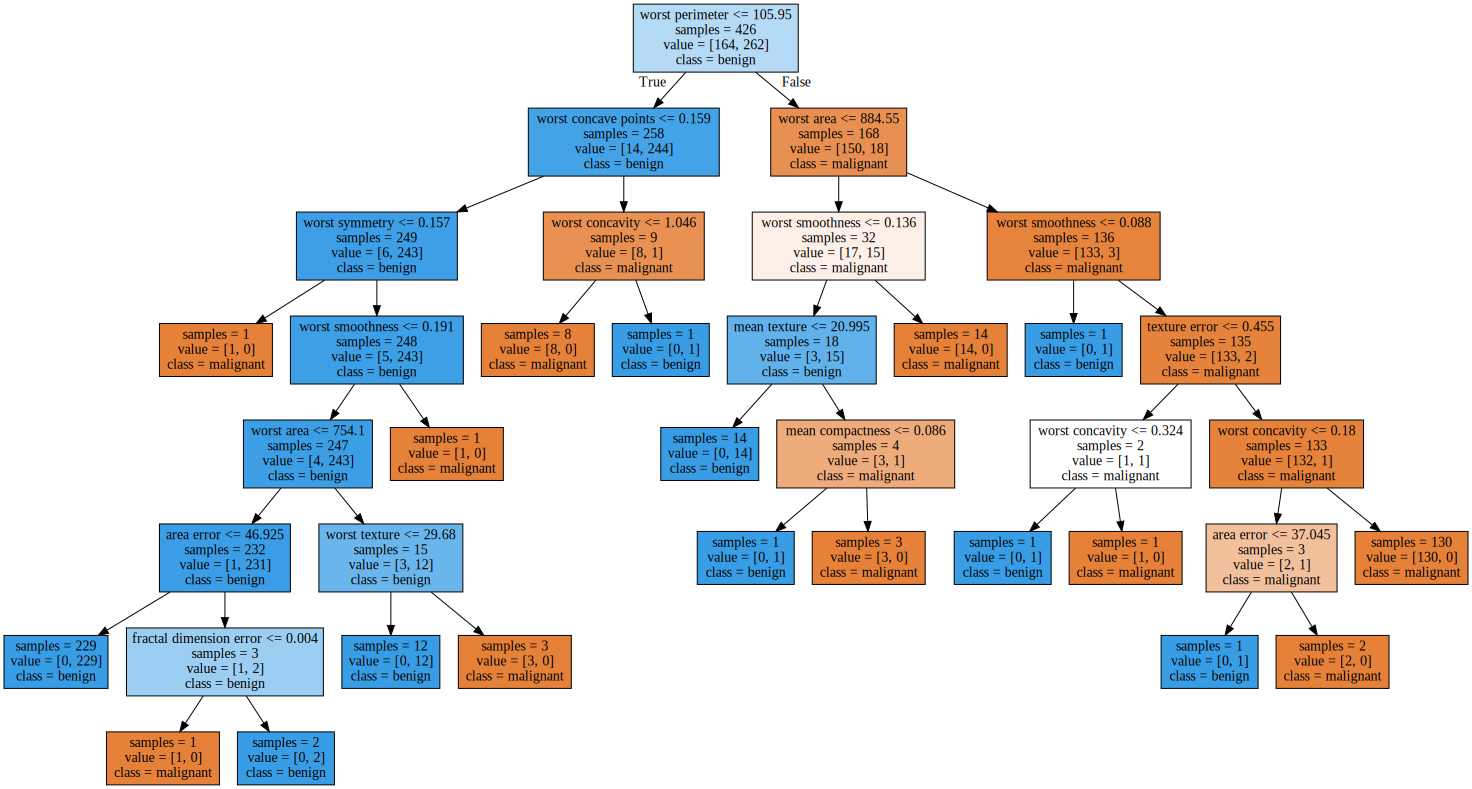

In [10]:
with open('tree.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [11]:
### save dot to png
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='tree')

'tree.png'

### 결정트리의 옵션들
- max_depth : 몇 고개를 내려갈 것인지 정함
- max_leaf_nodes : 총 잎노드의 갯수를 제한한다
- min_samples_split : 만일 10이라면, 노드의 샘플 갯수가 10이상이 되어야 분기를 한다.
- min_samples_leaf : 10이라면, 잎노드의 샘플 갯수는 10이상이 되도록 만든다.
- max_features : 분기를 할 때 고려하는 속성의 갯수이다. 만일 2라면 판단할 속성을 고를때 랜덤하게 속성 2개만 뽑아 그 중에서 기준을 세운다.

In [13]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [12]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree2.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names, impurity=False, filled=True)

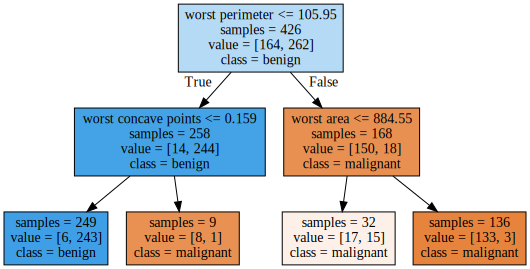

In [13]:
with open('tree2.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [14]:
model = DecisionTreeClassifier(min_samples_split=100)
model.fit(X_train, y_train)

from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree2.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names, impurity=False, filled=True)

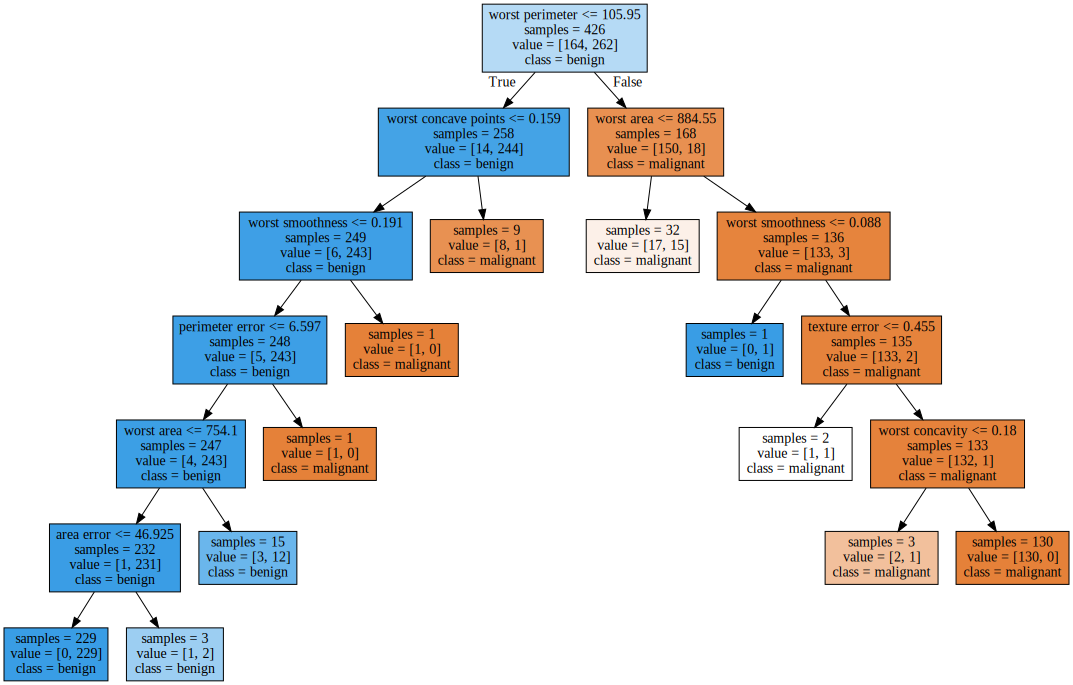

In [15]:
with open('tree2.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

- 이와같이 결정트리는 옵션을 정함에 따라 나무를 크게도 작게도 만들 수 있는 것이 큰 장점이다
- 옵션을 주지 않는 경우가 과대적합이고, 옵션을 많이 줄수록 과소적합이 된다

### 시각화를 위해 속성을 2개로 제한
- 결정트리는 정규화가 필요없다

In [18]:
X = cancer.data[:,:2] # 첫번째와 두번째 속서
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 2), (143, 2), (426,), (143,))

In [29]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8391608391608392

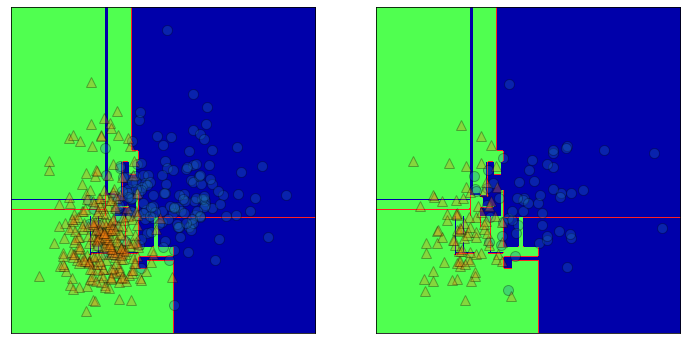

In [30]:
import mglearn

plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
mglearn.plots.plot_2d_classification(model, X_train)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, alpha=0.3)

plt.subplot(1,2,2)
mglearn.plots.plot_2d_classification(model, X_train)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, alpha=0.3)

> - 결정경계가 수직, 수평으로 선이 됨을 주목 (결정트리의 각 노드에서 각 속성에 대해 기준값을 정했기 때문임)
> - 아무 옵션도 주지 않았기 때문에 삐져나와 있는 선들이 많이 보임 (학습데이터에 대해 하나라도 놓치지 않고 분류했기 때문임)

- max_depth=3 으로 제한

In [26]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8601398601398601

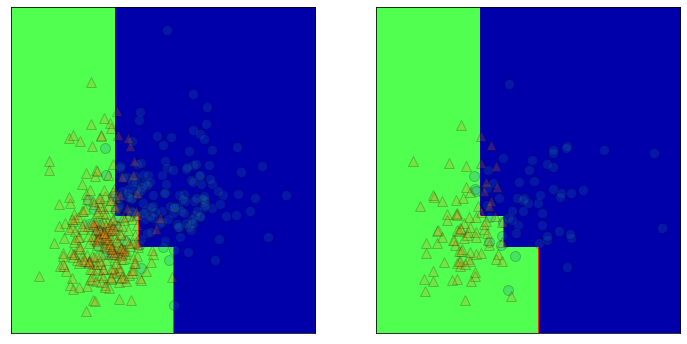

In [28]:
import mglearn

plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
mglearn.plots.plot_2d_classification(model, X_train)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, alpha=0.2)

plt.subplot(1,2,2)
mglearn.plots.plot_2d_classification(model, X_train)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, alpha=0.2)

### 결정트리의 첨단 모델들
- 랜덤 포레스트 : 작은 나무들을 여러개 만들어 다수결로 분류 결정
- 그래디언트 부스팅 : 작은 나무들을 하나씩 성능을 높이도록 추가해 나감 (고전적 머신러닝 모델중 최고의 성능을 보여줌)

### 기본 알고리즘
- 결정트리는 가장 잘 나누는 속성을 선택하고 경계값을 결정하기 위해 **엔트로피(entropy)** 라는 개념을 사용합니다.
- 엔트로피를 최대한 낮추는 것이 목표입니다.
- 줄어든 엔트로피의 양을 **Information Gain** 이라고 합니다.
- 엔트로피 개념은 딥러닝에서 사용하는 **크로스엔트로피** 와 연결됩니다
> $ E_{org} = - (p_1 log{p_1} + p_2 log{p_2}) $ <br>
> $ E_{new} = - {N_1 \over N} (p_{11} log{p_{11}} + p_{12} log{p_{12}}) - {N_2 \over N} (p_{21} log{p_{21}} + p_{22} log{p_{22}}) $ <br>
> $ E_{new} < E_{org} $ <br>
> $ E_{new} = min_i(E_{new\_i}) $